In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns

In [2]:

def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters

Normal_aminoacids={ #From swissprot
        'A':8.25,
        'G':3.93,
        'V':6.86,
        'L':9.65,
        'I':5.92,
        'P':4.73,
        'F':3.68,
        'W':1.09,
        'M':2.41,
        'S':6.63,
        'T':5.35,
        'C':1.38,
        'Y':2.92,
        'N':4.06,
        'Q':3.93,
        'K':5.81,
        'R':5.53,
        'H':2.27,
        'D':5.46,
        'E':6.72
    }


In [310]:

def slicydicy(word):
    word= word.split('|')[2]
    word=word.split(':')[0]
    word=word.split('_')[0]
    return word

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data=data.loc[data['#Feature']>=4]
    df = df.append(data)

df.dropna(subset=['Accession'], inplace=True, how='any')
df.reset_index(drop=True)
df['count'] = 1
df['Accession']=df['Accession'].apply(lambda x: slicydicy(x))
df = df.groupby(['Accession']).sum()
tot=df['#Feature'].sum()
df=df.sort_values(['#Feature'], ascending=False)[0:30]
df=df['#Feature']
df_misc=df[10:len(df)]
df_imp=df[0:10]
df_list_imp=list(df_imp)
other =df_misc.sum()
df_list_imp.append(other)
df_list_imp

[2298, 1255, 876, 417, 381, 230, 198, 162, 123, 114, 1050]

In [308]:
colors=['#CF004A',
'#6E6A86'
,'#8967D9',
'#39A07D',
'#9DB5D9',
'#54BB66',
'#674BC2',
'#C0C8D6',
'#D785CC',
'#3DB122',
'#C35316',
'#C690E9']
df_misc.sum()
len(df_imp)
test =(list(df_imp.keys()))
test.append('Other')
test

['FIBA',
 'HBA',
 'APOA4',
 'A1AT',
 'APOB',
 'ITIH4',
 'APOA1',
 'HBB',
 'G3P',
 'APOC2',
 'Other']

Text(0.5, 1.0, 'Ninf')

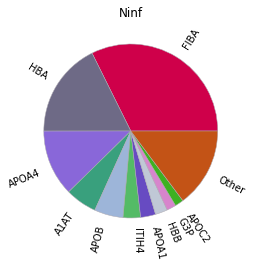

In [311]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors) 
plt.title('Ninf')

Text(0.5, 1.0, 'Inf')

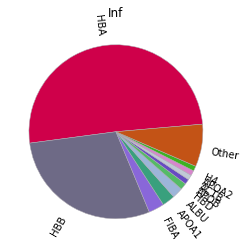

In [305]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors,startangle= 5 ) 
plt.title('Inf')

Text(0.5, 1.0, 'WF')

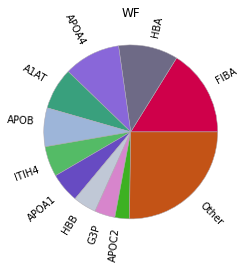

In [309]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 
plt.pie(list(df_list_imp),labels = test , wedgeprops=wp, rotatelabels=True, colors=colors) 
plt.title('WF')

In [340]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    df = df.append(data)

df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4]) #this can be changed to view different amounts of AA
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide'].apply(lambda x: x[-1::1])
df['Spectral count']=df['#Feature']
df = df[['Peptide', 'Spectral count','count', 'N-cut', 'C-cut','First aa','Last aa']]


df.sort_values('Spectral count', ascending = False)

Peptide  \
Accession                                                          
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             AGVANALAHKYH   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN              GVANALAHKYH   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                ANALAHKYH   
sp|P68871|HBB_HUMAN                                  VHLTPEEKSAV   
sp|P69905|HBA_HUMAN                                    STVLTSKYR   
...                                                          ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TALAPSTMKIKI   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...      TEAPLNPK   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...      TTAEREIV   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...    PATGGVKKPH   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...     AGLQFPVGR   

                                                    Spectral count  count  \
Accession                                                                   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                        109      3   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                        109      3   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                         94      3   
sp|P68871|HBB_HUMAN                                             78      3   
sp|P69905|HBA_HUMAN                                             77      3   
...                                                            ...    ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...               4      1   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...               4      1   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...               4      1   

                                                   N-cut C-cut First aa  \
Accession                                                                 
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             AGVA  HKYH        A   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             GVAN  HKYH        G   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN             ANAL  HKYH        A   
sp|P68871|HBB_HUMAN                                 VHLT  KSAV        V   
sp|P69905|HBA_HUMAN                                 STVL  SKYR        S   
...                                                  ...   ...      ...   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TALA  KIKI        T   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TEAP  LNPK        T   
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...  TTAE  REIV        T   
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...  PATG  KKPH        P   
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...  AGLQ  PVGR        A   

                                                   Last aa  
Accession                                                   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN                  H  
sp|P68871|HBB_HUMAN                                      V  
sp|P69905|HBA_HUMAN                                      R  
...                                                    ...  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       I  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       K  
sp|P63261|ACTG_HUMAN:sp|P60709|ACTB_HUMAN:sp|P6...       V  
sp|P68431|H31_HUMAN:sp|Q71DI3|H32_HUMAN:sp|Q166...       H  
sp|Q99878|H2A1J_HUMAN:sp|Q96KK5|H2A1H_HUMAN:sp|...       R  

[1419 rows x 7 columns]

In [341]:
aminoacids= get_letter_frequency(df['Peptide']*df['Spectral count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['Spectral count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['Spectral count'])
First_aa=get_letter_frequency(df['First aa']*df['Spectral count'])
Last_aa=get_letter_frequency(df['Last aa']*df['Spectral count'])
N_aminoacids

{'A': 6961,
 'G': 4771,
 'V': 5079,
 'L': 6407,
 'I': 293,
 'P': 3173,
 'F': 2250,
 'W': 781,
 'M': 552,
 'S': 4248,
 'T': 2823,
 'C': 0,
 'Y': 1405,
 'N': 1813,
 'Q': 571,
 'K': 2150,
 'R': 632,
 'H': 3829,
 'D': 4745,
 'E': 2605}

Text(0.5, 1.0, 'Last aminoacid')

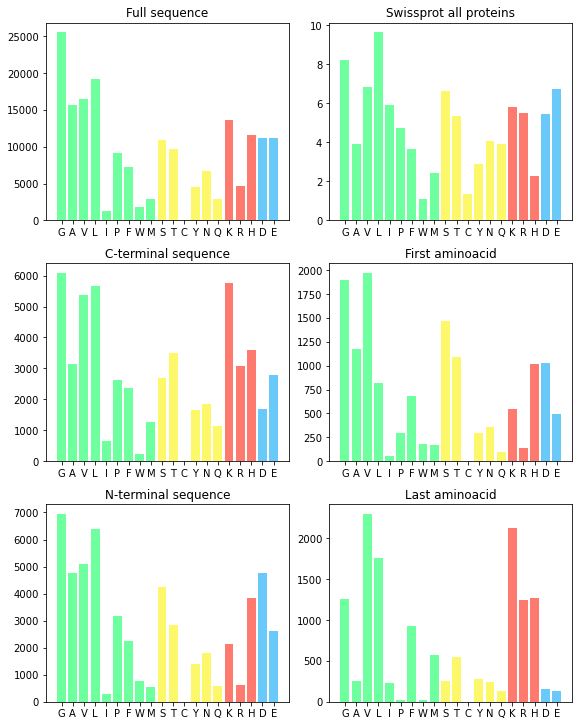

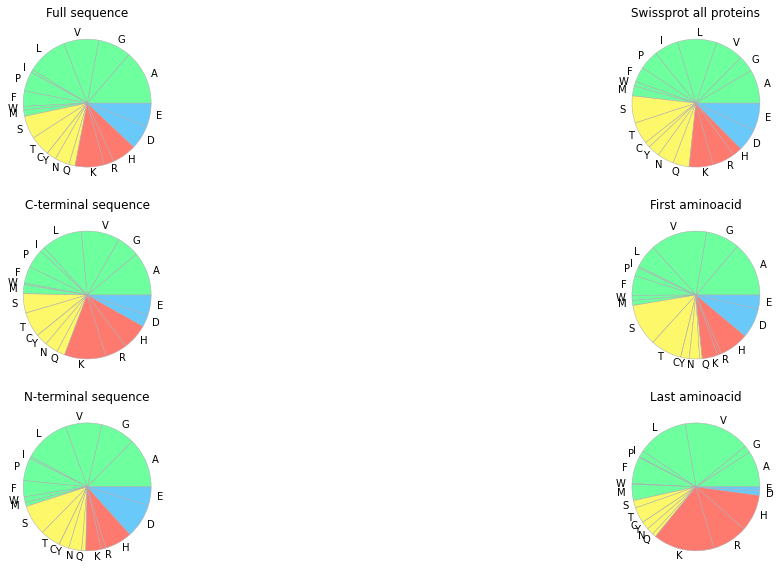

In [342]:

color=['#6eff9e', '#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#6eff9e','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#fcf86a','#ff7a6e','#ff7a6e','#ff7a6e','#69cafa','#69cafa','#69cafa']


fig, ax1 = plt.subplots(3,2,figsize=(8,10))
ax1[0,0].bar(range(len(aminoacids)), list(aminoacids.values()), align='center', color=color)
ax1[2,0].bar(range(len(N_aminoacids)), list(N_aminoacids.values()), align='center', color=color)
ax1[1,0].bar(range(len(C_aminoacids)), list(C_aminoacids.values()), align='center', color=color)
ax1[1,1].bar(range(len(First_aa)), list(First_aa.values()), align='center', color=color)
ax1[2,1].bar(range(len(Last_aa)), list(Last_aa.values()), align='center', color=color)
ax1[0,1].bar(range(len(Normal_aminoacids)), list(Normal_aminoacids.values()), align='center', color=color)

ax1[0,0].set_title('Full sequence')
ax1[0,1].set_title('Swissprot all proteins')
ax1[2,0].set_title('N-terminal sequence')
ax1[1,0].set_title('C-terminal sequence')
ax1[1,1].set_title('First aminoacid')
ax1[2,1].set_title('Last aminoacid')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.setp(ax1, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], xticklabels=['G','A','V','L','I','P','F','W','M','S','T','C','Y','N','Q','K','R','H','D','E'])

fig, ax = plt.subplots(3,2,figsize=(20,10))
wp = { 'linewidth' : 0.5, 'edgecolor' : "#afabb3" } 

ax[0,0].pie(aminoacids.values(),labels = aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[2,0].pie(N_aminoacids.values(),labels =N_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,0].pie(C_aminoacids.values(),labels = C_aminoacids.keys(), colors=color, wedgeprops=wp) 
ax[1,1].pie(First_aa.values(),labels = First_aa.keys(), colors=color, wedgeprops=wp) 
ax[2,1].pie(Last_aa.values(),labels = Last_aa.keys(), colors=color, wedgeprops=wp) 
ax[0,1].pie(Normal_aminoacids.values(),labels = Normal_aminoacids.keys(), colors=color, wedgeprops=wp) 

ax[0,0].set_title('Full sequence')
ax[0,1].set_title('Swissprot all proteins')
ax[2,0].set_title('N-terminal sequence')
ax[1,0].set_title('C-terminal sequence')
ax[1,1].set_title('First aminoacid')
ax[2,1].set_title('Last aminoacid')

# Finding duplicates

In [17]:

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
total_number_of_peptides=0
number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    total_number_of_peptides+=len(data.index)
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    print("Number of total (including modified) peptides in "+file+" "+str(len(data.index)))
    for_stdev.append(len(data.index))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.groupby(['Peptide','Accession']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df['First aa']=df['Peptide'].apply(lambda x: x[0:1])
df['Last aa']=df['Peptide'].apply(lambda x: x[-1::1])
df['Spectral count']=df['#Feature']
df['Spectral count WF1']=df['#Feature WF1']
df['Spectral count WF2']=df['#Feature WF2']
df['Spectral count WF3']=df['#Feature WF 3']
df['Spectral count WF4']=df['#Feature WF4']
df['Spectral count WF5']=df['#Feature WF5']
df = df[['Peptide', 'Mass', 'Length', 'RT', 'Spectral count', 'Spectral count WF1','Spectral count WF2', 'Spectral count WF3', 'Spectral count WF4','Spectral count WF5','count', 'N-cut', 'C-cut','First aa','Last aa']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['Spectral count','Accession','count'], ascending=False)

aminoacids = get_letter_frequency(df['Peptide']*df['count'])
N_aminoacids=get_letter_frequency(df['N-cut']*df['count'])
C_aminoacids=get_letter_frequency(df['C-cut']*df['count'])
First_aa=get_letter_frequency(df['First aa']*df['count'])
Last_aa=get_letter_frequency(df['Last aa']*df['count'])


print("Standard deviation: "+ str(np.std(for_stdev)))
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print('total number of peptides: '+str(total_number_of_peptides))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")

df[df.duplicated(['Peptide'], keep=False)].sort_values('Peptide').to_excel('Duplicates.xlsx')

Number of total (including modified) peptides in peptide _WF1.xlsx 833
Number of un-modified peptides in peptide _WF1.xlsx 766
Number of total (including modified) peptides in peptide_WF2.xlsx 960
Number of un-modified peptides in peptide_WF2.xlsx 884
Number of total (including modified) peptides in peptide_WF3.xlsx 925
Number of un-modified peptides in peptide_WF3.xlsx 865
Number of total (including modified) peptides in peptide_WF4.xlsx 589
Number of un-modified peptides in peptide_WF4.xlsx 543
Number of total (including modified) peptides in peptide_WF5.xlsx 870
Number of un-modified peptides in peptide_WF5.xlsx 802
Standard deviation: 130.74341283598193
Average length: 12.612202688728026
Average mass: 1399.0946740277775
total number of peptides: 16657
Number of peptides with feature>=4: 1934, in percent: 11.610734225850994 %


# Investigating cut-sites

In [199]:

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for_stdev=[]
total_number_of_peptides=0
number_of_files=0
for file in files_xlsx:
    number_of_files+=1
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    total_number_of_peptides+=len(data.index)
    data = data.loc[(data['#Feature'] >= 4)] # sorts out if feature<4
    print("Number of total (including modified) peptides in "+file+" "+str(len(data.index)))
    for_stdev.append(len(data.index))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data


df['count'] = 1
df = df.groupby(['Peptide','Accession']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut4']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut4']=df['Peptide'].apply(lambda x: x[-4::1])
df['N-cut1']=df['Peptide'].apply(lambda x: x[0:1])
df['C-cut1']=df['Peptide'].apply(lambda x: x[-1::1])
df['N-cut3']=df['Peptide'].apply(lambda x: x[0:3])
df['C-cut3']=df['Peptide'].apply(lambda x: x[-3::1])
df['N-cut5']=df['Peptide'].apply(lambda x: x[0:5])
df['C-cut5']=df['Peptide'].apply(lambda x: x[-5::1])
df['N-cut2']=df['Peptide'].apply(lambda x: x[0:2])
df['C-cut2']=df['Peptide'].apply(lambda x: x[-2::1])
df = df.sort_values(['#Feature','Accession','count'], ascending=False)

df=df[['count','#Feature','Peptide','N-cut1','C-cut1','N-cut2','C-cut2','N-cut3','C-cut3','N-cut4','C-cut4','N-cut5','C-cut5']]

df

Number of total (including modified) peptides in peptide _WF1.xlsx 833
Number of un-modified peptides in peptide _WF1.xlsx 766
Number of total (including modified) peptides in peptide_WF2.xlsx 960
Number of un-modified peptides in peptide_WF2.xlsx 884
Number of total (including modified) peptides in peptide_WF3.xlsx 925
Number of un-modified peptides in peptide_WF3.xlsx 865
Number of total (including modified) peptides in peptide_WF4.xlsx 589
Number of un-modified peptides in peptide_WF4.xlsx 543
Number of total (including modified) peptides in peptide_WF5.xlsx 870
Number of un-modified peptides in peptide_WF5.xlsx 802


count  #Feature  \
Accession                                                             
sp|Q04206|TF65_HUMAN                                    5       160   
sp|P01009|A1AT_HUMAN                                    4       103   
sp|P04406|G3P_HUMAN                                     5        65   
sp|Q14624|ITIH4_HUMAN                                   5        58   
sp|P06727|APOA4_HUMAN                                   5        58   
...                                                   ...       ...   
sp|O14791|APOL1_HUMAN                                   1         4   
sp|O14791|APOL1_HUMAN                                   1         4   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...      1         4   
sp|A0A0C4DH69|KV109_HUMAN                               1         4   
sp|A0A0C4DH25|KVD20_HUMAN                               1         4   

                                                                       Peptide  \
Accession                                                                        
sp|Q04206|TF65_HUMAN                                                  PSLQAPVR   
sp|P01009|A1AT_HUMAN                                         AVLTIDEKGTEAAGAMF   
sp|P04406|G3P_HUMAN                                         AVGKVIPELNGKLTGMAF   
sp|Q14624|ITIH4_HUMAN                                                  NFRPGVL   
sp|P06727|APOA4_HUMAN                                                NHQLEGLTF   
...                                                                        ...   
sp|O14791|APOL1_HUMAN                                         RVTEPISAESGEQVER   
sp|O14791|APOL1_HUMAN                               RVTEPISAESGEQVERVNEPSILEMS   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...       KAYTAVEGDEVSLLEGEAVEV   
sp|A0A0C4DH69|KV109_HUMAN                                  DIQLTQSPSFLSASVGDRV   
sp|A0A0C4DH25|KVD20_HUMAN                                  EIVLTQSPATLSLSPGERA   

                                                   N-cut1 C-cut1 N-cut2  \
Accession                                                                 
sp|Q04206|TF65_HUMAN                                    P      R     PS   
sp|P01009|A1AT_HUMAN                                    A      F     AV   
sp|P04406|G3P_HUMAN                                     A      F     AV   
sp|Q14624|ITIH4_HUMAN                                   N      L     NF   
sp|P06727|APOA4_HUMAN                                   N      F     NH   
...                                                   ...    ...    ...   
sp|O14791|APOL1_HUMAN                                   R      R     RV   
sp|O14791|APOL1_HUMAN                                   R      S     RV   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...      K      V     KA   
sp|A0A0C4DH69|KV109_HUMAN                               D      V     DI   
sp|A0A0C4DH25|KVD20_HUMAN                               E      A     EI   

                                                   C-cut2 N-cut3 C-cut3  \
Accession                                                                 
sp|Q04206|TF65_HUMAN                                   VR    PSL    PVR   
sp|P01009|A1AT_HUMAN                                   MF    AVL    AMF   
sp|P04406|G3P_HUMAN                                    AF    AVG    MAF   
sp|Q14624|ITIH4_HUMAN                                  VL    NFR    GVL   
sp|P06727|APOA4_HUMAN                                  TF    NHQ    LTF   
...                                                   ...    ...    ...   
sp|O14791|APOL1_HUMAN                                  ER    RVT    VER   
sp|O14791|APOL1_HUMAN                                  MS    RVT    EMS   
sp|A6NI72|NCF1B_HUMAN:sp|A8MVU1|NCF1C_HUMAN:sp|...     EV    KAY    VEV   
sp|A0A0C4DH69|KV109_HUMAN                              RV    DIQ    DRV   
sp|A0A0C4DH25|KVD20_HUMAN                              RA    EIV    ERA   

                                                   N-cut4 C-cut4 N-cut5 C-cut5  
Accession                   

In [200]:
df_1=df[['N-cut1','C-cut1','#Feature','count']]
df_1_N=df_1.groupby(df['N-cut1']).sum()
df_1_C=df_1.groupby(df['C-cut1']).sum()
df_1_N=df_1_N.sort_values('count', ascending=False)
df_1_C=df_1_C.sort_values('count', ascending=False)

In [201]:
df_2=df[['N-cut2','C-cut2','#Feature','count']]
df_2_N=df_2.groupby(df['N-cut2']).sum()
df_2_C=df_2.groupby(df['C-cut2']).sum()
df_2_N=df_2_N.sort_values('count', ascending=False)
df_2_C=df_2_C.sort_values('count', ascending=False)

In [202]:
df_3=df[['N-cut3','C-cut3','#Feature','count']]
df_3_N=df_3.groupby(df['N-cut3']).sum()
df_3_C=df_3.groupby(df['C-cut3']).sum()
df_3_N=df_3_N.sort_values('count', ascending=False)
df_3_C=df_3_C.sort_values('count', ascending=False)

In [203]:
df_4=df[['N-cut4','C-cut4','#Feature','count']]
df_4_N=df_4.groupby(df['N-cut4']).sum()
df_4_C=df_4.groupby(df['C-cut4']).sum()
df_4_N=df_4_N.sort_values('count', ascending=False)
df_4_C=df_4_C.sort_values('count', ascending=False)

In [204]:
df_5=df[['N-cut5','C-cut5','#Feature','count']]
df_5_N=df_5.groupby(df['N-cut5']).sum()
df_5_C=df_5.groupby(df['C-cut5']).sum()
df_5_N=df_5_N.sort_values('count', ascending=False)
df_5_C=df_5_C.sort_values('count', ascending=False)

In [205]:

cut_N_list={
    1:list(df_1_N['count']),
    2:list(df_2_N['count']),
    3:list(df_3_N['count']),
    4:list(df_4_N['count']),
    5:list(df_5_N['count']),
}


<Figure size 432x288 with 0 Axes>

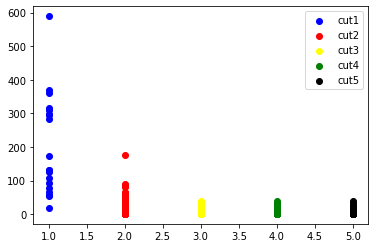

In [147]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

In [206]:

cut_C_list={
    1:list(df_1_C['count']),
    2:list(df_2_C['count']),
    3:list(df_3_C['count']),
    4:list(df_4_C['count']),
    5:list(df_5_C['count']),
}


<Figure size 432x288 with 0 Axes>

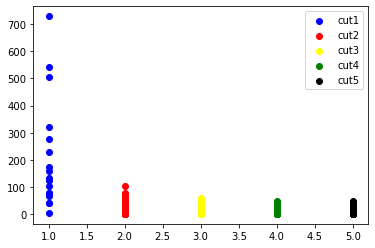

In [149]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

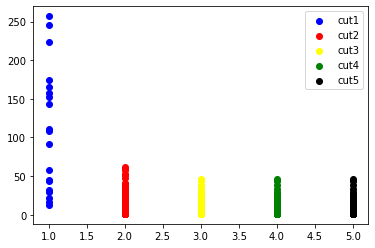

In [162]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

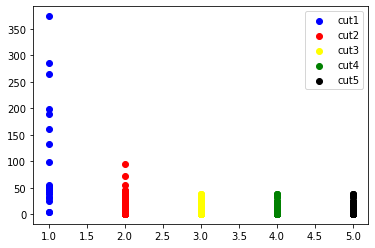

In [163]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

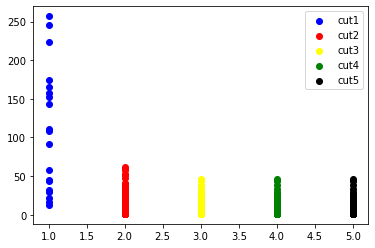

In [170]:

fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_N_list[1]), cut_N_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_N_list[2]), cut_N_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_N_list[3]), cut_N_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_N_list[4]), cut_N_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_N_list[5]), cut_N_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

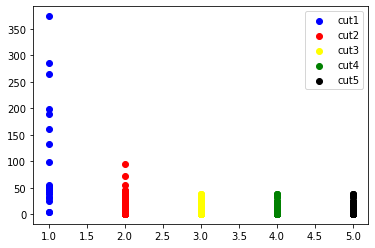

In [171]:
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter([1]*len(cut_C_list[1]), cut_C_list[1],color='blue', label='cut1')
ax.scatter([2]*len(cut_C_list[2]), cut_C_list[2],color='red', label='cut2')
ax.scatter([3]*len(cut_C_list[3]), cut_C_list[3],color='yellow', label='cut3')
ax.scatter([4]*len(cut_C_list[4]), cut_C_list[4],color='green', label='cut4')
ax.scatter([5]*len(cut_C_list[5]), cut_C_list[5],color='black', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

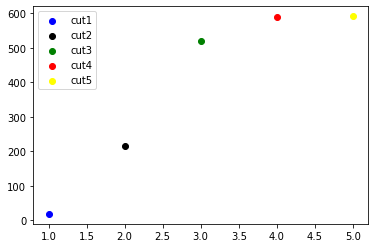

In [177]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

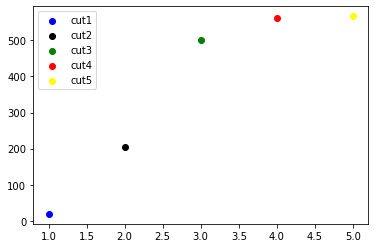

In [179]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

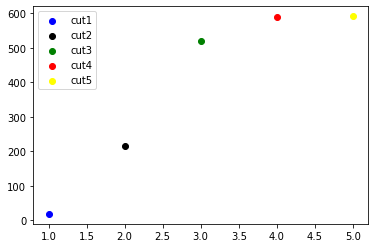

In [188]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

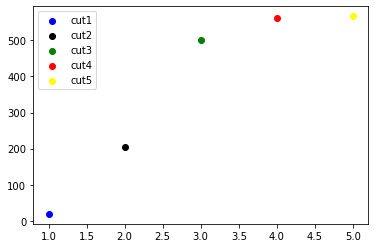

In [189]:
#inf
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

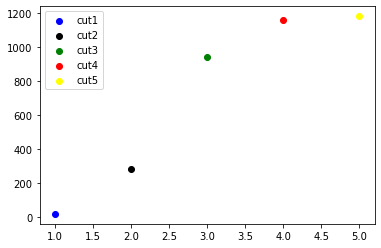

In [207]:
#WF
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_N_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_N_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_N_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_N_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_N_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

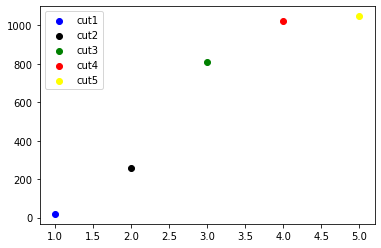

In [208]:
#WF
fig=plt.figure()
len(cut_list[key])
fig, ax = plt.subplots()
ax.scatter(([1]), len(cut_C_list[1]),color='blue', label='cut1')
ax.scatter(([2]), len(cut_C_list[2]),color='black', label='cut2')
ax.scatter(([3]), len(cut_C_list[3]),color='green', label='cut3')
ax.scatter(([4]), len(cut_C_list[4]),color='red', label='cut4')
ax.scatter(([5]), len(cut_C_list[5]),color='yellow', label='cut5')



plt.legend()
plt.show()